# 프로젝트 2
### 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
- datetime: 자전거 대여가 이루어진 날짜와 시간
- season: 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)
- holiday: 공휴일 여부 (0: 아니오, 1: 예)
- workingday: 근무일 여부 (0: 주말 및 공휴일, 1: 근무일)
- weather: 날씨 상황
  - 1 - 맑음, 약간 흐림
  - 2 - 안개 + 흐림, 안개 + 깨끗, 약간 눈, 약간 비 + 천둥
  - 3 - 약간 눈 + 안개, 약간 비 + 안개, 천둥
  - 4 - 폭우 + 얼음, 천둥/번개 + 우박
-  temp: 실제 온도 (섭씨)
-  atemp: 체감 온도 (섭씨)
-  humidity: 습도 (%)
-  windspeed: 풍속 (mph)
-  casual: 등록되지 않은 사용자(비회원) 대여 수
-  registered: 등록된 사용자(회원) 대여 수
-  count: 총 대여 수 (타겟 변수)

### 0. 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1.데이터 가져오기
- train.csv 데이터 사용

In [2]:
train = pd.read_csv('C:/Users/lkg/Desktop/vscode/lms/data/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2. datetime 컬럼 변형
- datetime 자료형으로 변환
- 연, 월, 일, 시, 분, 초 6가지 컬럼 생성

In [3]:
dt = pd.DatetimeIndex(train["datetime"])
train['year'] = dt.year
train['month'] = dt.month
train['day'] = dt.day
train['hour'] = dt.hour
train['minute'] = dt.minute
train['second'] = dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 3. 시간 변수 데이터 개수 시각화
- sns.countplot 사용
- subplot: 한 번에 6개의 그래프 그리기

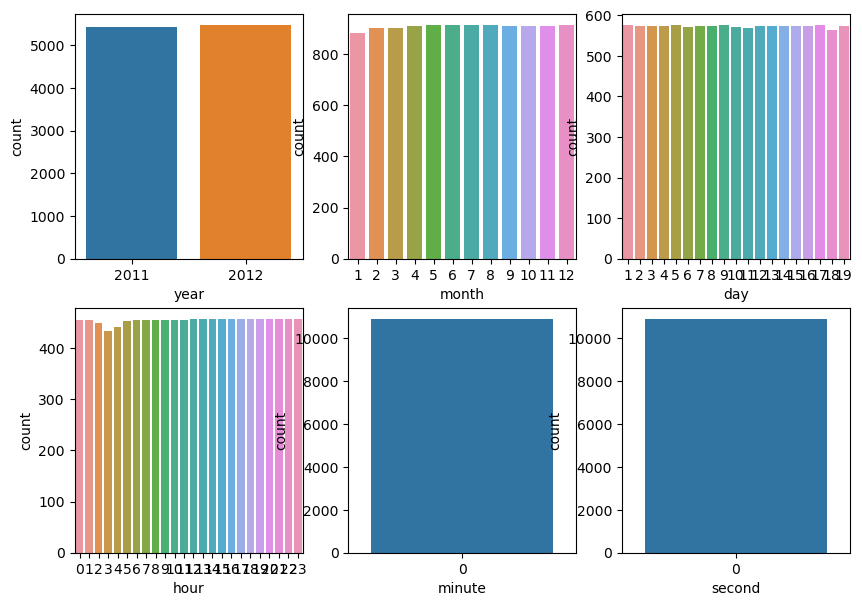

In [4]:
fig, axes = plt.subplots(2,3, figsize=(10,7) )
sns.countplot(x=train['year'], ax=axes[0,0])
sns.countplot(x=train['month'], ax=axes[0,1])
sns.countplot(x=train['day'], ax=axes[0,2])
sns.countplot(x=train['hour'] ,ax=axes[1,0])
sns.countplot(x=train['minute'] ,ax=axes[1,1])
sns.countplot(x=train['second'], ax=axes[1,2])
plt.show()

<Axes: xlabel='second', ylabel='count'>

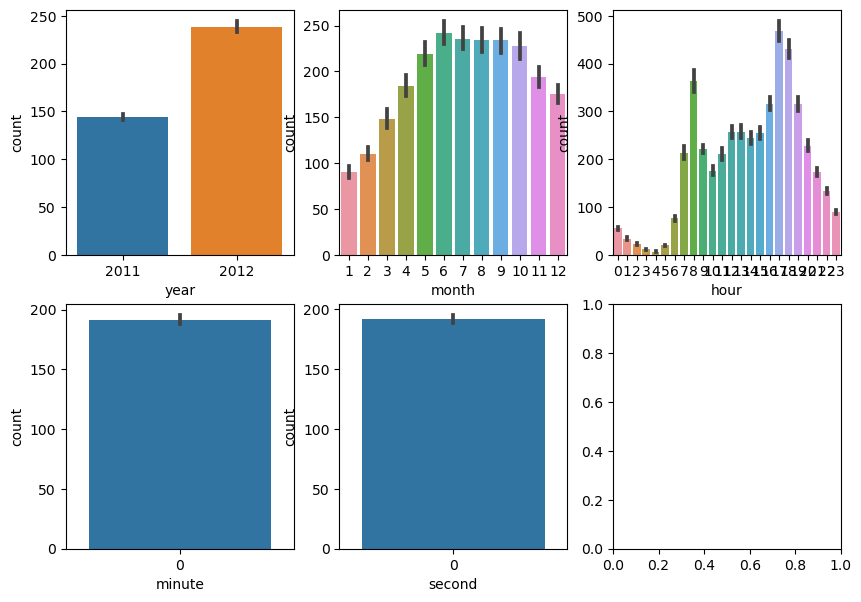

In [21]:
fig, axes = plt.subplots(2,3, figsize=(10,7) )
sns.barplot(x="year", y="count",data=train, ax=axes[0,0])
sns.barplot(x="month", y="count",data=train, ax=axes[0,1])
sns.barplot(x="hour", y="count",data=train, ax=axes[0,2])
sns.barplot(x="minute", y="count",data=train, ax=axes[1,0])
sns.barplot(x="second", y="count",data=train, ax=axes[1,1])

### 4. x, y 컬럼 선택 및 train/test 데이터 분리
- X: 사용하지 않을 feature 제거 -['datetime', 'casual', 'registered', 'count']
- Y: 'count'
- train set: 70%
- test set : 30%

In [9]:
cols = train.columns
print(cols)
new_cols = [col for col in cols if col not in ['datetime', 'casual', 'registered', 'count']]
print(new_cols)

x = train[new_cols]
y = train['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']
(8708, 14) (2178, 14) (8708,) (2178,)


### 5. LinearRegression 모델 학습
- sklearn - LinearRegression

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### 6. 예측값 출력 및 손실함수값 계산
- x_test로 예측값 출력
- 손실함수 계산
- mse, rmse

In [12]:
predictions = model.predict(x_test)
print("예측값:", predictions)

def MSE(y_act, y_pred):
    mse = ((y_act - y_pred) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = np.sqrt(mse)
    return mse, rmse

def loss(y_act, y_pred):
    L = MSE(y_act, y_pred)
    return L
loss(y_test, predictions)

mse, rmse = loss(y_test, predictions)
print("MSE:", mse)
print("RMSE:", rmse)

예측값: [318.35341732 249.65374213 241.68067463 ... 427.15051133 247.18505777
  10.89614239]
MSE: 20156.351517247513
RMSE: 141.97306616836698


### 7. 예측 결과 시각화하기
- 산점도 비교: (원래값: 파란색, 예측값: 주황색)
- x축: temp(1) | humidity(2)
- y축: count

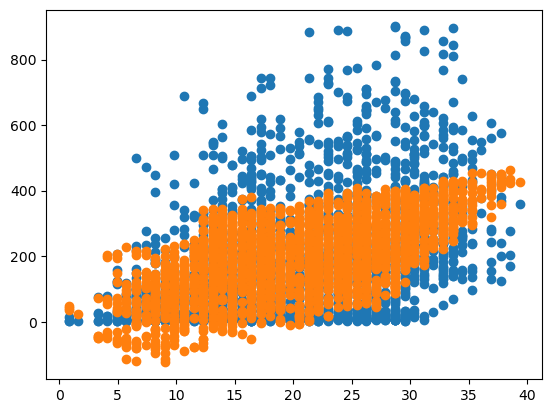

In [16]:
plt.scatter(x_test['temp'], y_test)
plt.scatter(x_test['temp'], predictions)
plt.show()

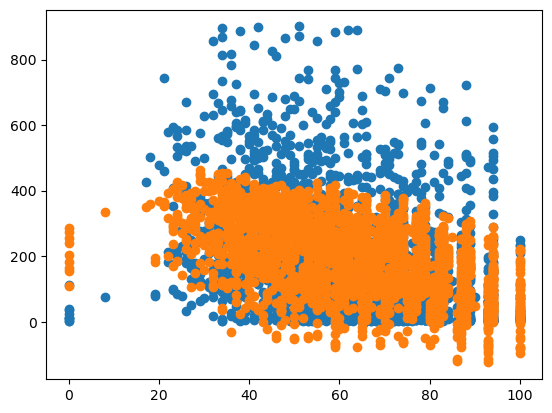

In [17]:
plt.scatter(x_test['humidity'], y_test)
plt.scatter(x_test['humidity'], predictions)
plt.show()